# Bank_Customer_Churn

### Import Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv("./Bank Customer Churn Prediction.csv")

In [4]:
df.head()
df.info()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


- **RowNumber**, **CustomerId**, **Surname** are to be dropped because they do not have any effect on the model
- All categorical columns are to be encoded

### Data Preprocessing

Duplicates and Null values

In [5]:
duplicate = df[df.duplicated(keep='first')]
duplicate

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [6]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

- No duplicates and null values

### Exploratory Data Analysis

churn
0    7963
1    2037
Name: count, dtype: int64

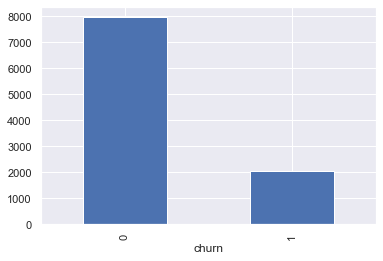

In [7]:
#Counting 1 and 0 Value in Churn column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["churn"].map(lambda x: color_wheel.get(x + 1))
df['churn'].value_counts()
p=df['churn'].value_counts().plot(kind="bar")

In [8]:
#Change value in country column
df['country'] = df['country'].replace(['Germany'],'0')
df['country'] = df['country'].replace(['France'],'1')
df['country'] = df['country'].replace(['Spain'],'2')


#Change value in gender column
df['gender'] = df['gender'].replace(['Female'],'0')
df['gender'] = df['gender'].replace(['Male'],'1')

In [9]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#convert object data types column to integer
df['country'] = pd.to_numeric(df['country'])
df['gender'] = pd.to_numeric(df['gender'])
df.dtypes

customer_id           int64
credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [11]:
#Remove customer_id column
df2 = df.drop('customer_id', axis=1)
df2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

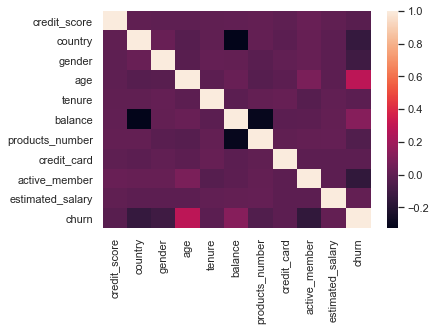

In [14]:
sns.heatmap(df2.corr(), fmt='.2g')

### Model Building

In [15]:
X = df2.drop('churn', axis=1)
y = df2['churn']

In [16]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

##### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

DecisionTreeClassifier()

Accuracy Score : 79.5 %


##### RandomForest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

RandomForestClassifier()

Accuracy Score : 86.45 %


#### Support Vector Machines

In [19]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

SVC()

Accuracy Score : 79.45 %


##### XGB Classifier

In [20]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy Score : 85.9 %


- Visualize Random Forest and XGBoost Algorithm because Random Forest and XGBoost Algorithm have the Best Accuracy

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

#### Random Forest

In [22]:
y_pred = rfc.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1589
           1       0.78      0.47      0.59       411

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



<Figure size 360x360 with 0 Axes>

<AxesSubplot:>

Text(21.5, 0.5, 'Actual label')

Text(0.5, 45.79999999999998, 'Predicted label')

Text(0.5, 1.0, 'Accuracy Score: 0.8645')

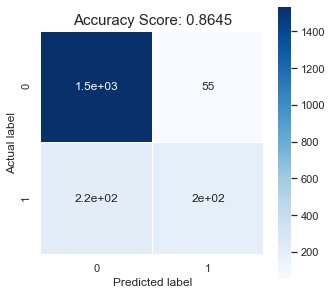

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

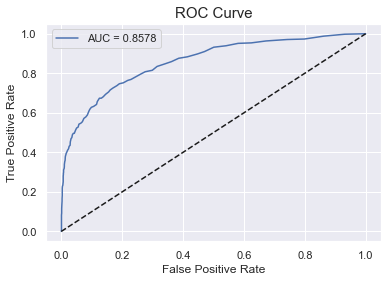

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

#### XGB Classifier

In [25]:
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1589
           1       0.73      0.50      0.59       411

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



<Figure size 360x360 with 0 Axes>

<AxesSubplot:>

Text(21.5, 0.5, 'Actual label')

Text(0.5, 45.79999999999998, 'Predicted label')

Text(0.5, 1.0, 'Accuracy Score: 0.859')

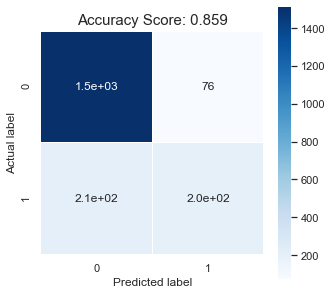

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

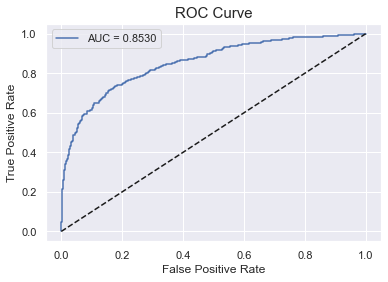

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()